#XG BOOSTING METHOD & LIGHT GRADIENT BOOSTING METHOD

In [144]:
#Importing all The basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [145]:
# Lets Load The Dataset
traindata=pd.read_csv("/content/drive/MyDrive/Assignments/XGBM & LBGM/Titanic_train.csv")
testdata=pd.read_csv("/content/drive/MyDrive/Assignments/XGBM & LBGM/Titanic_test.csv")

In [146]:
#Calling the first few data entries of the train data
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
# calling the first few data entries of the test data
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [148]:
print(traindata)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [149]:
#copying the train data into another empty dataframe so to have canges done to it
data1=traindata.copy()

In [150]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
#Dropping the un-needed attributes out of the dataframe
data1.drop(["Cabin","Ticket","Name","PassengerId"],axis=1,inplace=True)

In [152]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [153]:
#copying the test data
data2=testdata.copy()
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [154]:
#removing the same attributes as to the train data
data2.drop(["Cabin","Ticket","Name","PassengerId"],axis=1,inplace=True)

In [155]:
data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


- The train data has the target variable and that is the attribute survived and test data doesnt have it so now i am reordering to keep the target column at the last

In [156]:
# Identify the target column
target_column = 'Survived'

# Reorder the columns
columns = list(data1.columns)
columns.remove(target_column)
columns.append(target_column)

# Reassign the DataFrame with the reordered columns
data1_reordered = data1[columns]

# Display the first few rows of the modified dataset
data1_reordered.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [157]:
#identifying the null values and the number of null values in the train data
data1_reordered.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [158]:
#identifying the null values and the number of null values in the test data
data2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

- The train data i.e. data1_reordered has 177 null values for the attribute age
- The test data i.e. data2 has 86 null values for the attribute age

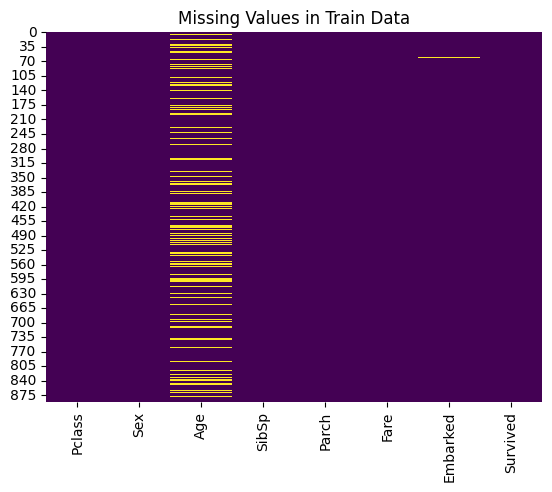

In [159]:
# Visual Representation of the Missing Values
sns.heatmap(data1_reordered.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Data')
plt.show()

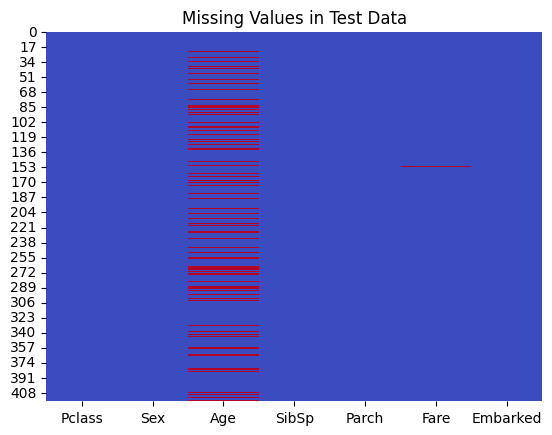

In [160]:
sns.heatmap(data2.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values in Test Data')
plt.show()

In [161]:
from tabulate import tabulate

# Create a dictionary with the data
data = {
    "Metric": ["Train data total entries","Test data total entries"],
    "total entries":[data1_reordered.shape[0],data2.shape[0]]
}
# Convert dictionary to a DataFrame
df = pd.DataFrame(data)
# Print the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+--------------------------+-----------------+
|    | Metric                   |   total entries |
+====+==========================+=================+
|  0 | Train data total entries |             891 |
+----+--------------------------+-----------------+
|  1 | Test data total entries  |             418 |
+----+--------------------------+-----------------+


- So, the train data consists of 891 entries and in which 177 entries have missing age values
- The Test data consists of 418 entries and in which 86 have missing age values
- We are going to fill in the null values in both the datasets and in both the attributes[*Embarked attribute also have null values 2 in the train data and Fare has 1 in the test data*]
- We are going to fill the *Age* with the **Mean Method** and the *Embarked* with the **Mode Method** and *Fare* with the **Median Method**

In [162]:
# Fill missing values in 'Age' with the median
data1_reordered['Age'].fillna(data1_reordered['Age'].median(), inplace=True)
data2['Age'].fillna(data2['Age'].median(), inplace=True)


In [163]:
# Fill missing values in 'Embarked' with the mode
data1_reordered['Embarked'].fillna(data1_reordered['Embarked'].mode()[0], inplace=True)
data2['Embarked'].fillna(data2['Embarked'].mode()[0], inplace=True)

In [164]:
# Fill missing values in 'Fare' in the test set with the median
data2['Fare'].fillna(data2['Fare'].median(), inplace=True)

In [165]:
#checking if the null values are gone and the data is clear off null values
data1_reordered.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [166]:
data2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

- Filled all the null values with the Appropriate Methods
- Let's do some Visualizations  first for the train data and the for the test data

####Visualizations

##### Train Data

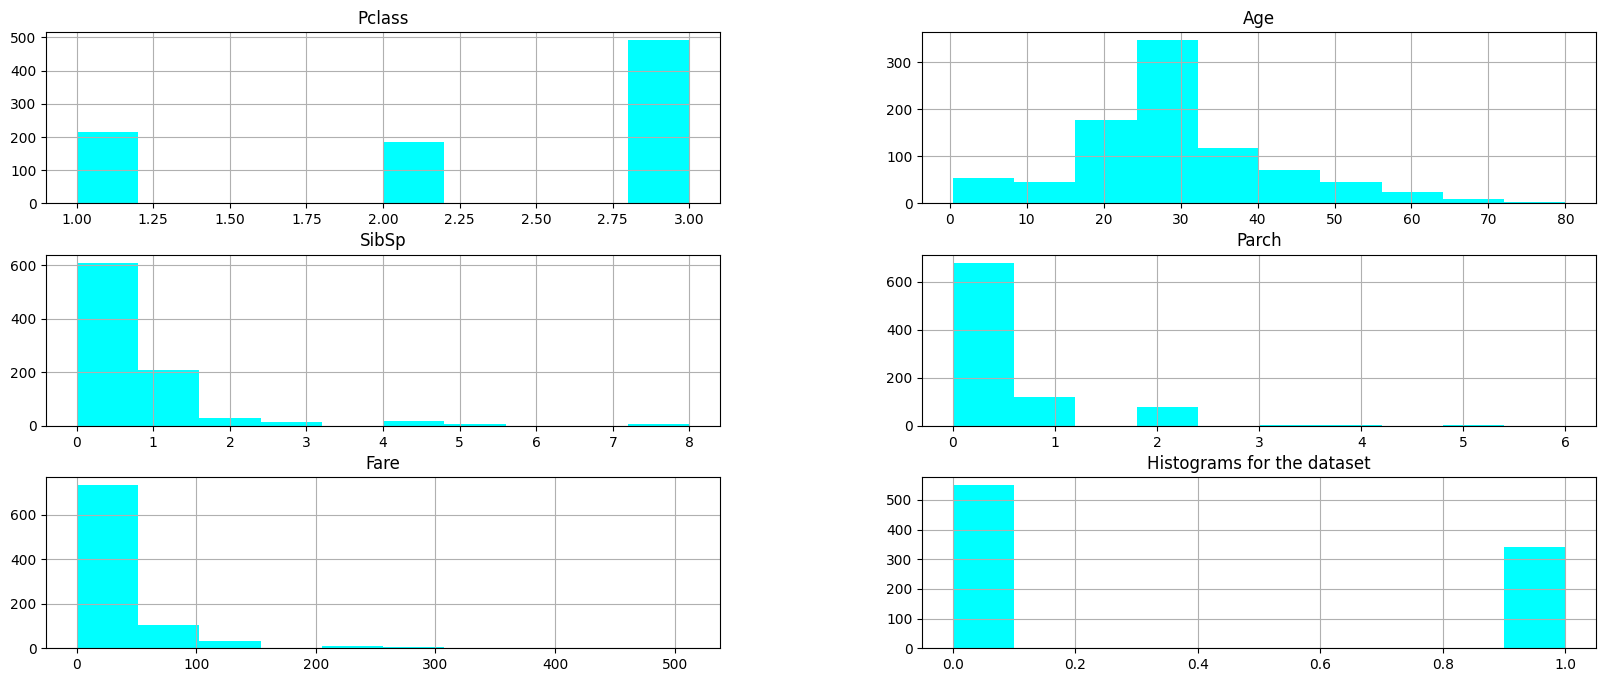

In [167]:
#PLotting the histogrmas to understand the data distribution
data1_reordered.hist(figsize=(20,8),color="cyan")
plt.title("Histograms for the dataset")
plt.show()

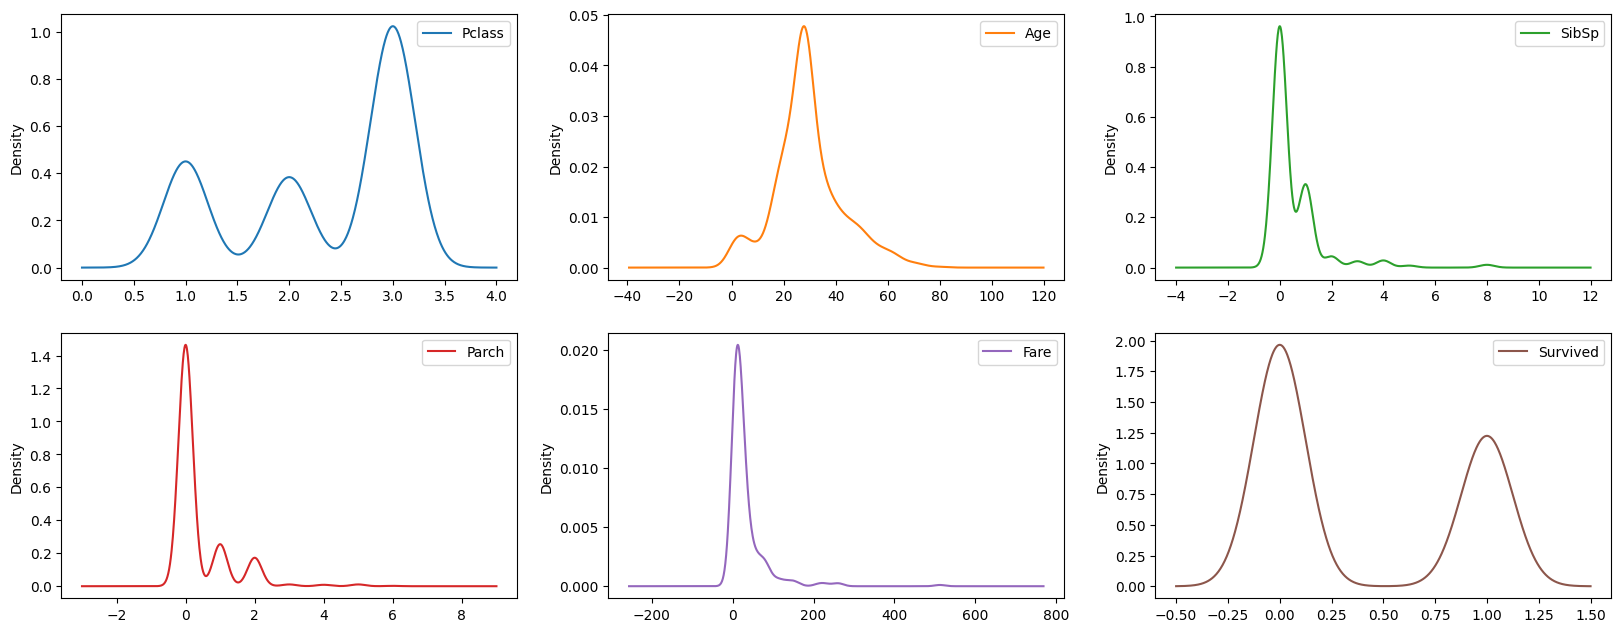

In [168]:
# Plotting the Density PLots to identify if the data distribution is skewed are not
data1_reordered.plot(kind='density', subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
plt.title("The KDE Plots for the data attributes")
plt.show()

In [169]:
data1_reordered.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208,0.383838
std,0.836071,13.019697,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [170]:
#Importing the Label Encoder to encode the categorical data variables
from sklearn.preprocessing import LabelEncoder

In [171]:
# Encode categorical variables
label_encoder = LabelEncoder()
data1_reordered['Sex'] = label_encoder.fit_transform(data1_reordered['Sex'])
data2['Sex'] = label_encoder.transform(data2['Sex'])
data1_reordered['Embarked'] = label_encoder.fit_transform(data1_reordered['Embarked'])
data2['Embarked'] = label_encoder.transform(data2['Embarked'])

In [172]:
data1_reordered.skew(0)

Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
Survived    0.478523
dtype: float64

In [173]:
data2.skew()

Pclass     -0.534170
Sex        -0.568991
Age         0.660747
SibSp       4.168337
Parch       4.654462
Fare        3.692299
Embarked   -0.873825
dtype: float64

- The attributes are mostly rigt skewed and and the order goes like  **Fare, SibSp,Parch**  have the highest skewness compared to other
- the test data also have these three attributes with the hishest skewness and those are also right skewed

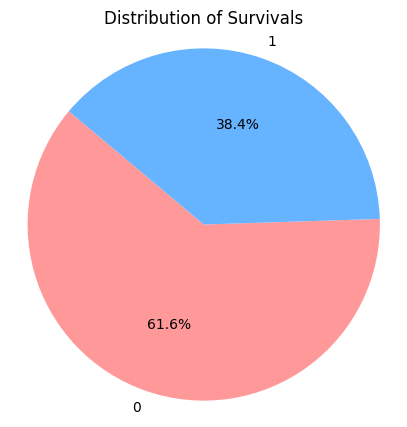

In [174]:
# Let's PLot the pie chart to get te percentage of different types present in the dataset
num_counts = data1_reordered['Survived'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Survivals')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

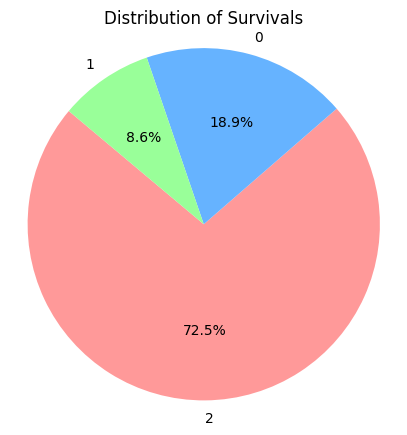

In [175]:
# Let's PLot the pie chart to get te percentage of different types present in the dataset
num_counts_1 = data1_reordered['Embarked'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts_1, labels=num_counts_1.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Survivals')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- 0 is S
- 1 is C
- 2 is Q

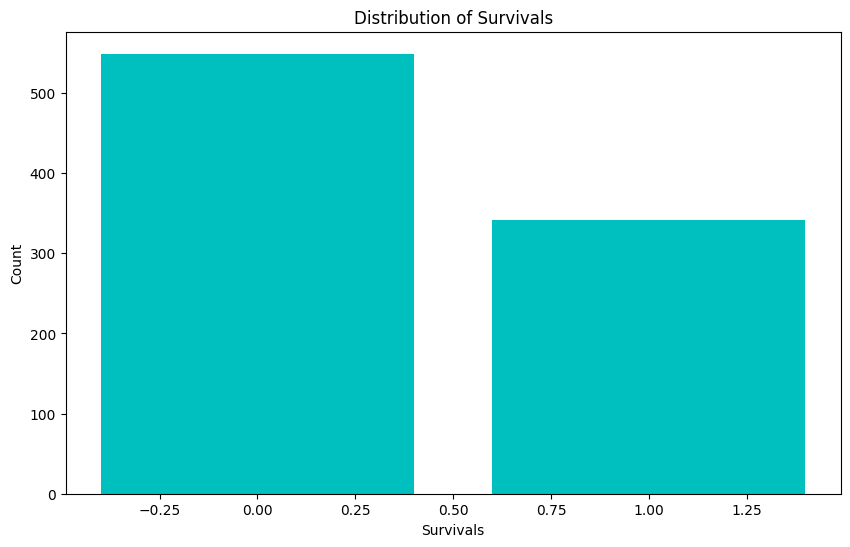

In [176]:
# Bar chart for the 'Survived' column
type_counts = data1_reordered['Survived'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(type_counts.index, type_counts.values, color='c')

# Add labels and title
plt.xlabel('Survivals')
plt.ylabel('Count')
plt.title('Distribution of Survivals')

# Show the plot
plt.show()

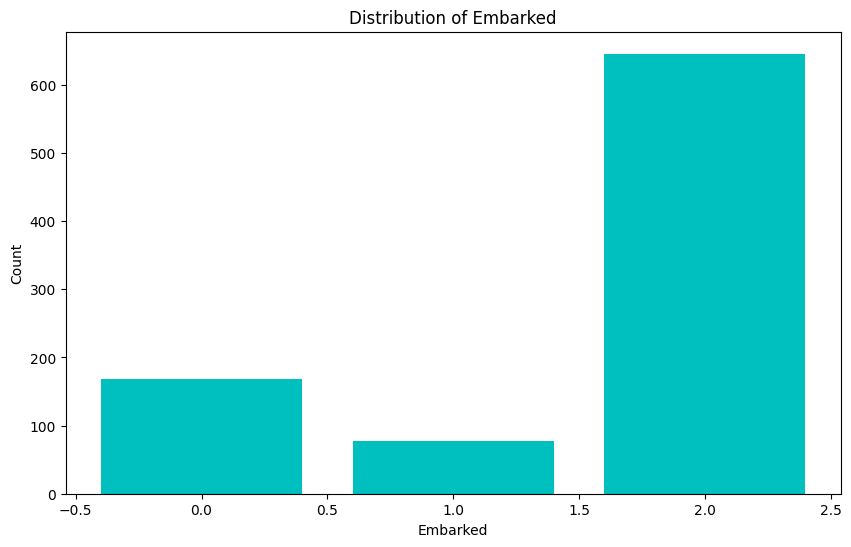

In [177]:
# Bar chart for the 'Embarked' column
type_counts_1 = data1_reordered['Embarked'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(type_counts_1.index, type_counts_1.values, color='c')

# Add labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')

# Show the plot
plt.show()

<Axes: >

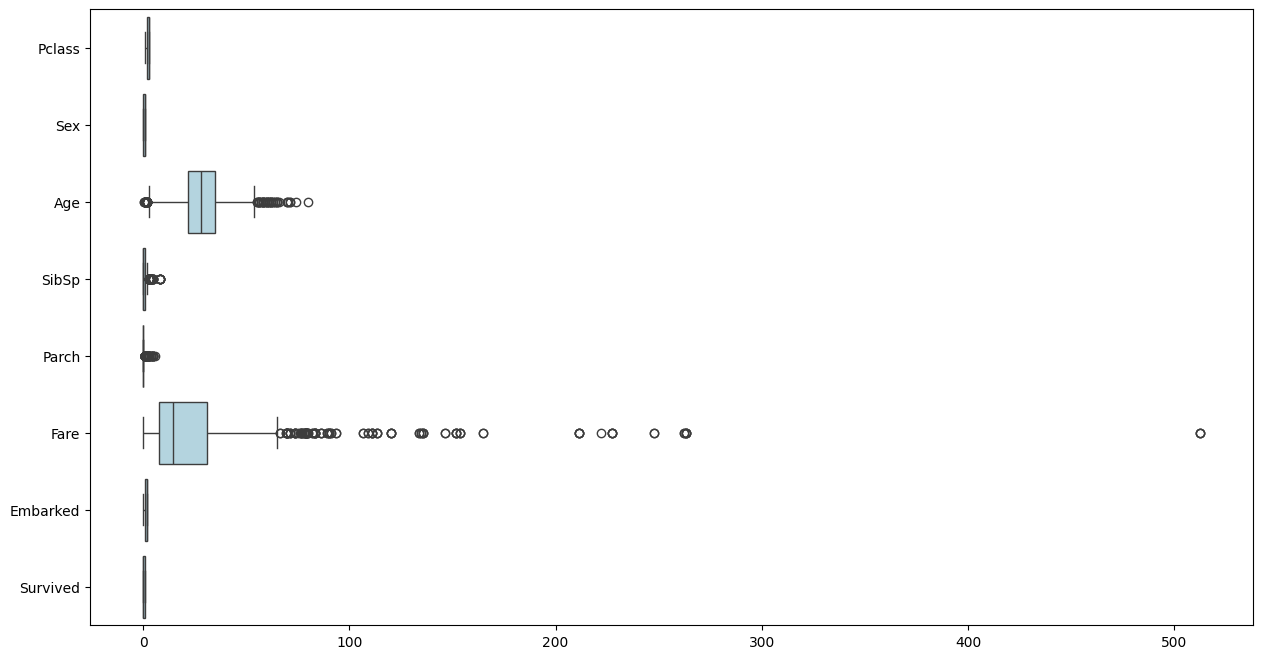

In [178]:
#Plotting the Box-Plot to see for the outliers the data has
plt.figure(figsize=(15,8))
sns.boxplot(data=data1_reordered, orient="h", color="lightblue")

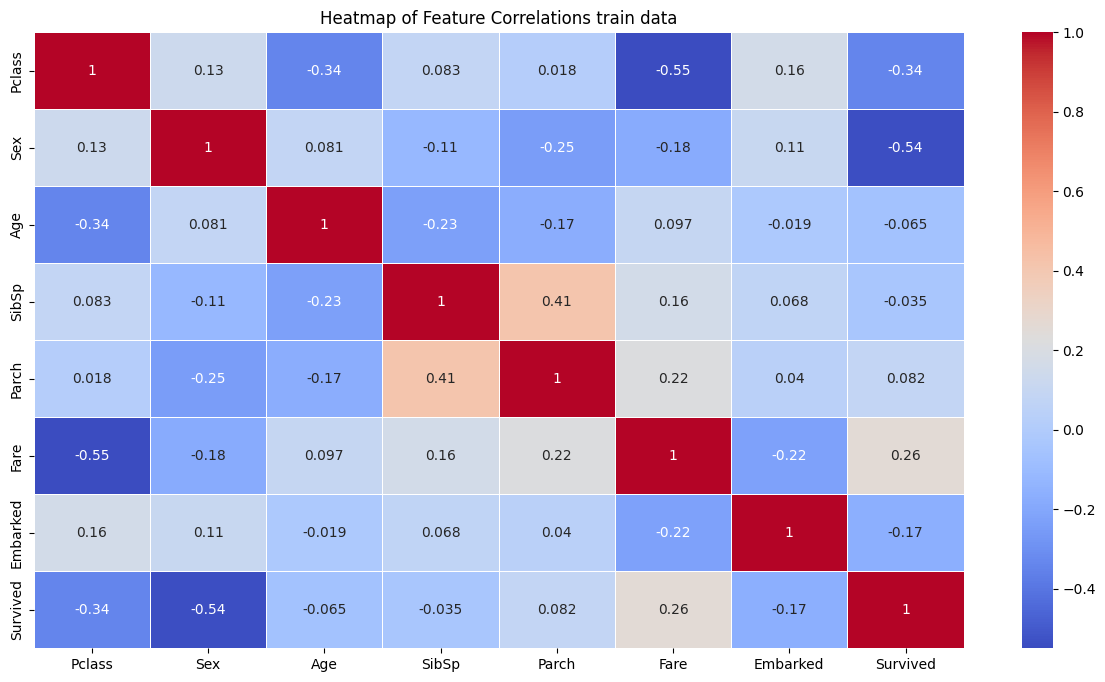

In [179]:
#Finding the correlation matrix
correlation_matrix=data1_reordered.corr()

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations train data')
plt.show()

- **Heat Map** in terms of **Correlation Matrix** is a better and efficient way to find the correlation between the attributes and how strong their relation is

##### Test Data

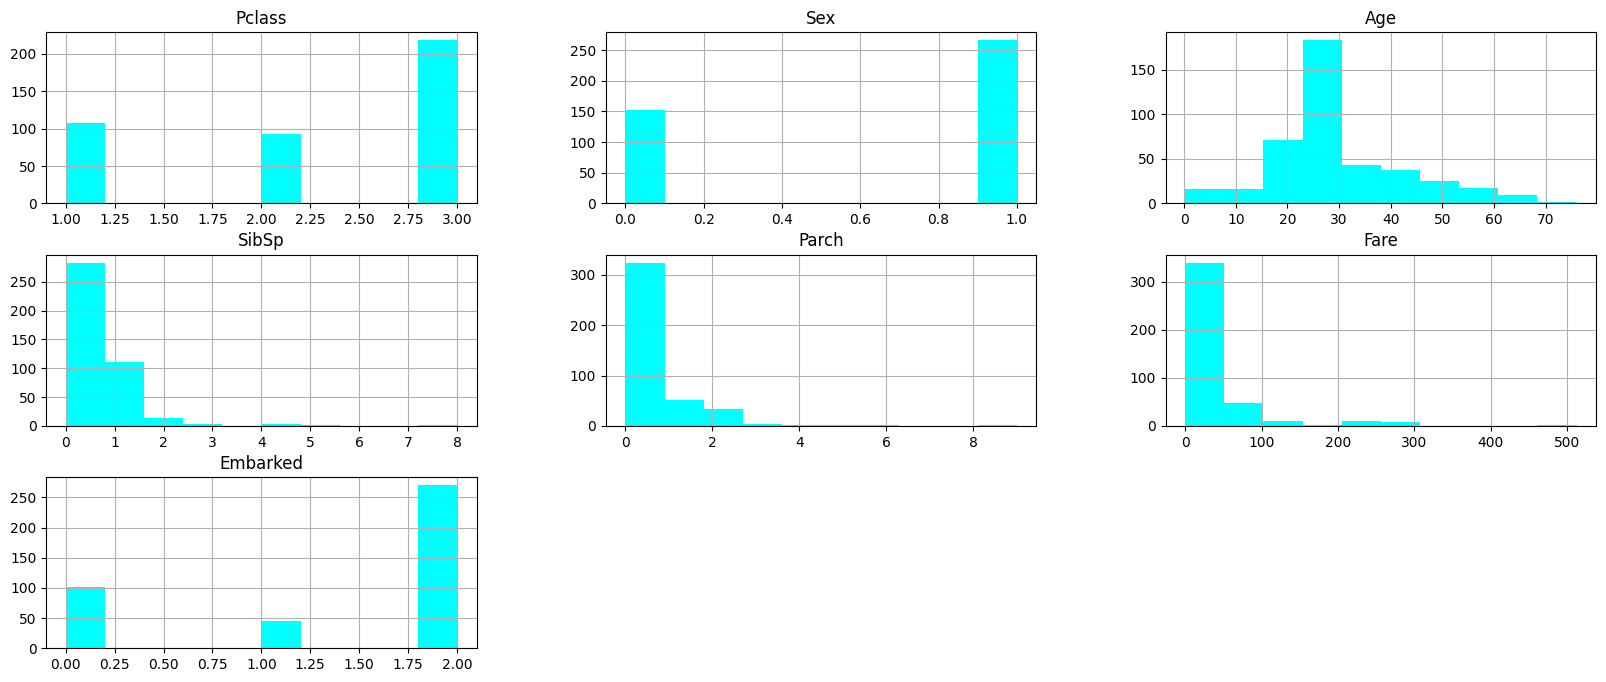

In [180]:
data2.hist(figsize=(20,8),color="cyan")
plt.title("Histograms for the dataset")
plt.show()

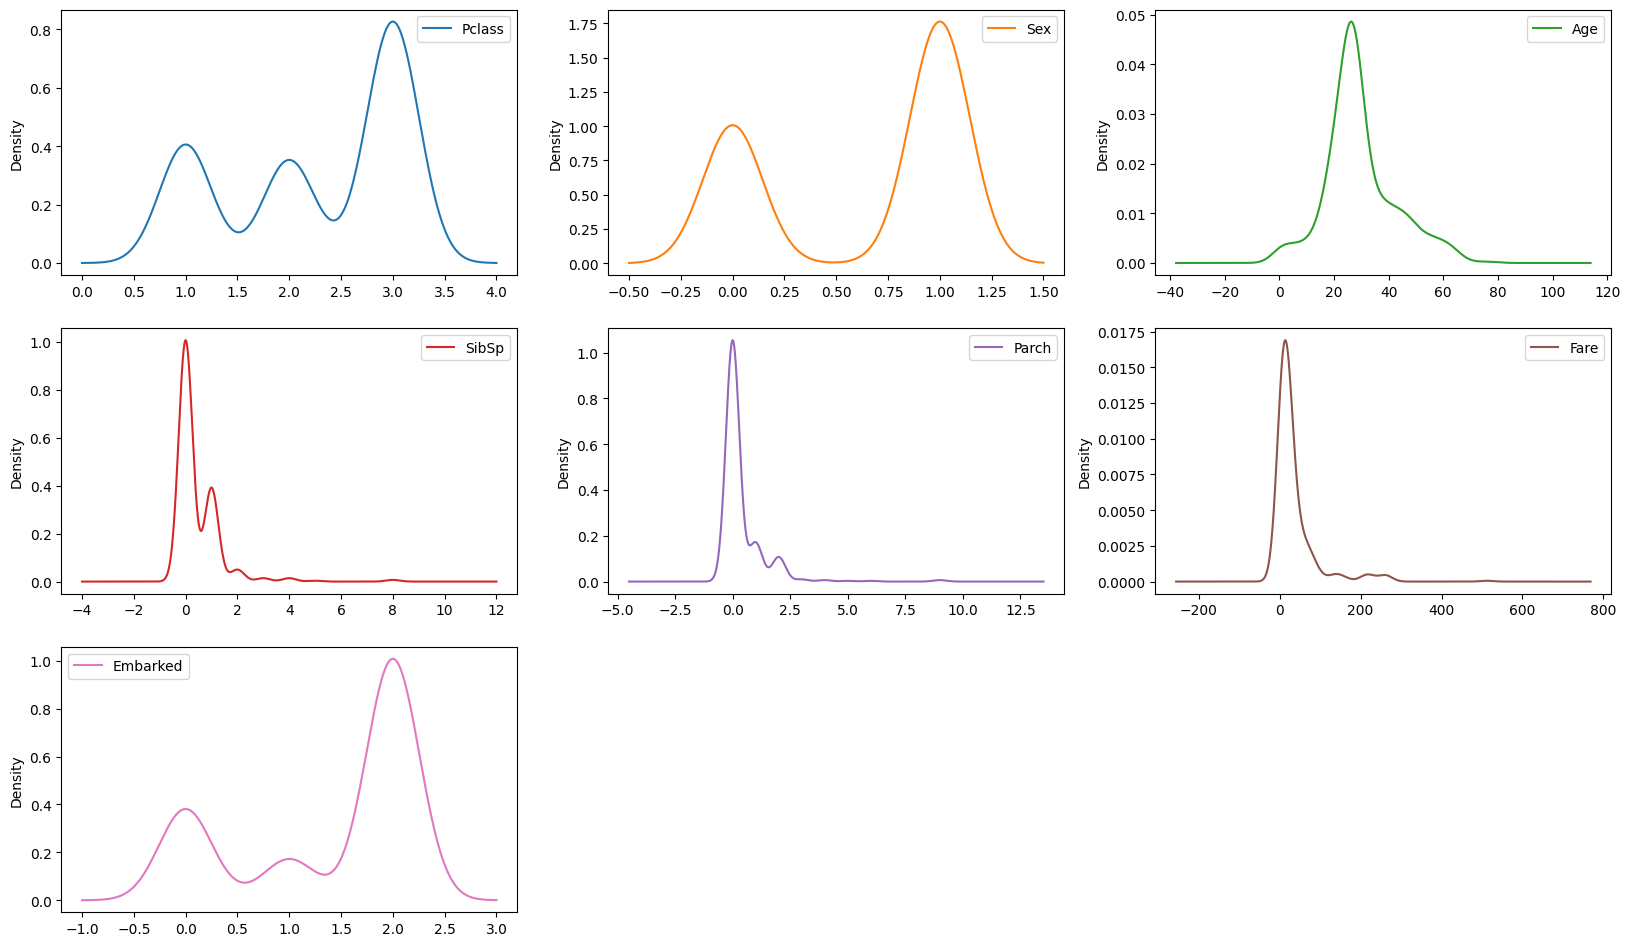

In [181]:
data2.plot(kind='density', subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
plt.title("The KDE Plots for the data attributes")
plt.show()

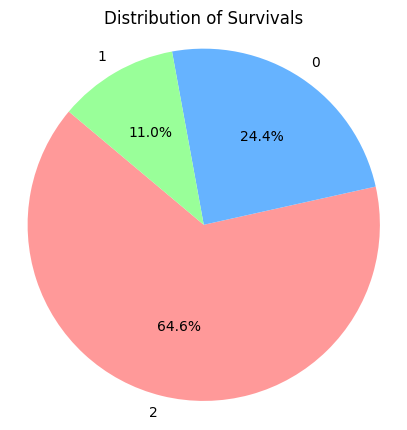

In [182]:
# Let's PLot the pie chart to get te percentage of different types present in the dataset
num_counts_2 = data2['Embarked'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts_2, labels=num_counts_2.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Survivals')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

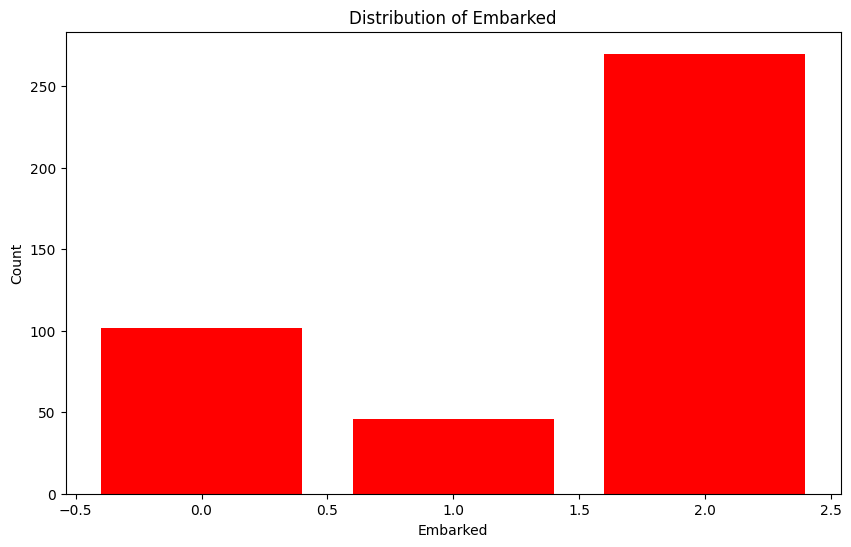

In [183]:
# Bar chart for the 'Embarked' column
type_counts_2 = data2['Embarked'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(type_counts_2.index, type_counts_2.values, color='red')

# Add labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')

# Show the plot
plt.show()

<Axes: >

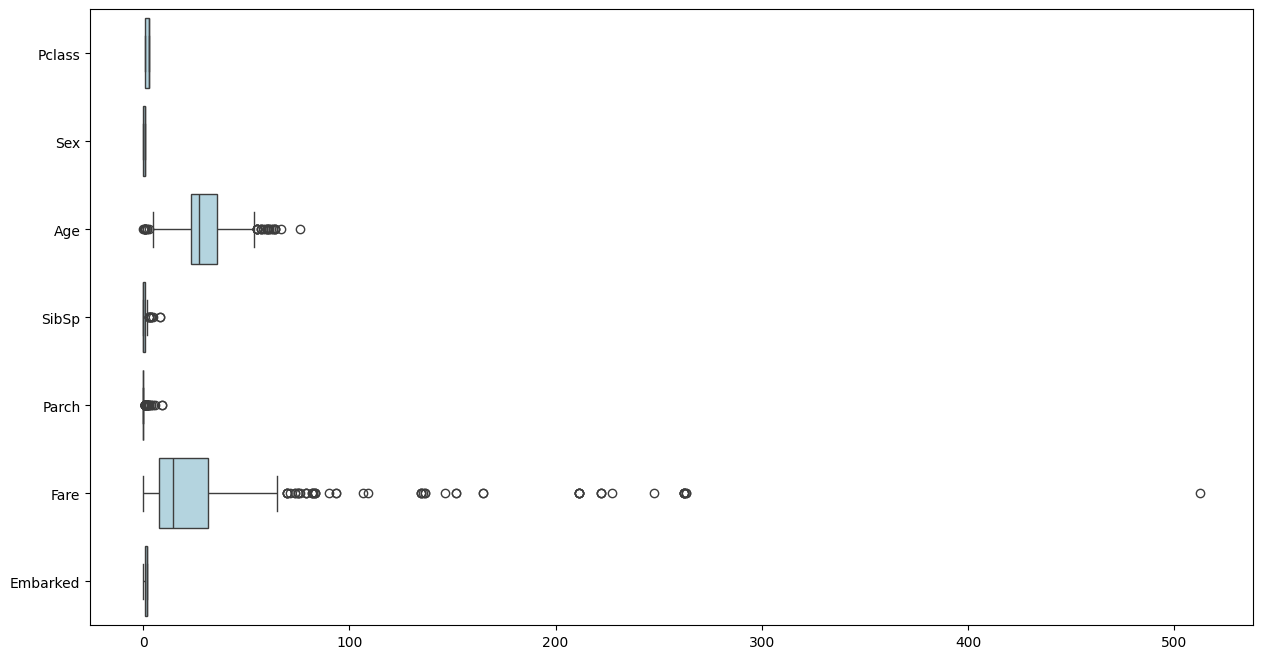

In [184]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data2, orient="h", color="lightblue")

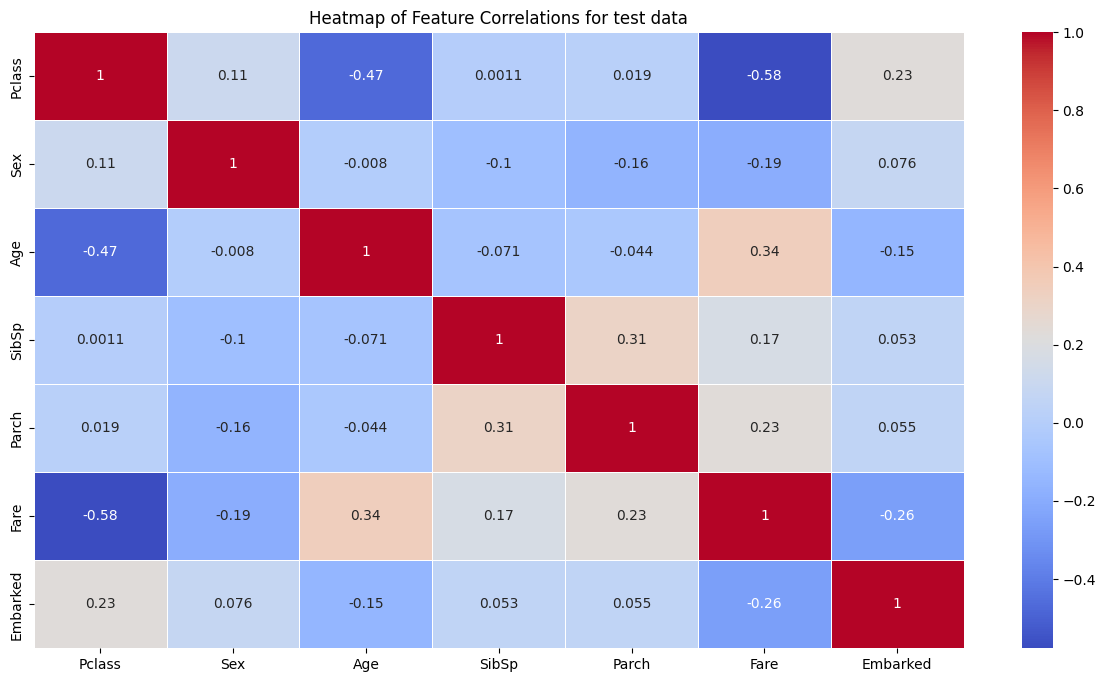

In [185]:
correlation_matrix_2=data2.corr()

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations for test data')
plt.show()

#### Transformation of the data to reduce the skewness

In [186]:
# Identify skewed features
skewed_features = data1_reordered.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)

# Apply log transformation to the most skewed feature
skewed_feature = skewed_features.index[0]
data1_reordered[skewed_feature + '_log'] = np.log1p(data1_reordered[skewed_feature])
# and the next continued 2 cells is to log transform the other highly right skewwed data

In [187]:
skewed_feature_1 = skewed_features.index[1]
data1_reordered[skewed_feature_1 + '_log'] = np.log1p(data1_reordered[skewed_feature_1])

In [188]:
skewed_feature_2 = skewed_features.index[2]
data1_reordered[skewed_feature_2 + '_log'] = np.log1p(data1_reordered[skewed_feature_2])

In [189]:
data1_reordered.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Fare_log,SibSp_log,Parch_log
0,3,1,22.0,1,0,7.2500,2,0,2.110213,0.693147,0.0
1,1,0,38.0,1,0,71.2833,0,1,4.280593,0.693147,0.0
2,3,0,26.0,0,0,7.9250,2,1,2.188856,0.000000,0.0
3,1,0,35.0,1,0,53.1000,2,1,3.990834,0.693147,0.0
4,3,1,35.0,0,0,8.0500,2,0,2.202765,0.000000,0.0


- we have succesfully applied the log transformation for the data with highest skewness and we should do the same for the test data

In [190]:
# Identify skewed features
skewed_features_test = data2.select_dtypes(include=['number']).apply(lambda x: x.skew()).sort_values(ascending=False)

# Apply log transformation to the most skewed feature
skewed_feature_test = skewed_features_test.index[0]
data2[skewed_feature_test + '_log'] = np.log1p(data2[skewed_feature_test])

In [191]:
skewed_feature_test_1 = skewed_features_test.index[1]
data2[skewed_feature_test_1 + '_log'] = np.log1p(data2[skewed_feature_test_1])

In [192]:
skewed_feature_test_2 = skewed_features_test.index[2]
data2[skewed_feature_test_2 + '_log'] = np.log1p(data2[skewed_feature_test_2])

In [193]:
data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Parch_log,SibSp_log,Fare_log
0,3,1,34.5,0,0,7.8292,1,0.000000,0.000000,2.178064
1,3,0,47.0,1,0,7.0000,2,0.000000,0.693147,2.079442
2,2,1,62.0,0,0,9.6875,1,0.000000,0.000000,2.369075
3,3,1,27.0,0,0,8.6625,2,0.000000,0.000000,2.268252
4,3,0,22.0,1,1,12.2875,2,0.693147,0.693147,2.586824


In [194]:
# Drop specific columns
columns_to_drop = ["SibSp","Parch","Fare"]
final_train_data = data1_reordered.drop(columns=columns_to_drop)
final_test = data2.drop(columns=columns_to_drop)

In [195]:
final_train_data.head()

,Pclass,Sex,Age,Embarked,Survived,Fare_log,SibSp_log,Parch_log
0,3,1,22.0,2,0,2.110213,0.693147,0.0
1,1,0,38.0,0,1,4.280593,0.693147,0.0
2,3,0,26.0,2,1,2.188856,0.000000,0.0
3,1,0,35.0,2,1,3.990834,0.693147,0.0
4,3,1,35.0,2,0,2.202765,0.000000,0.0


In [196]:
target_column = 'Survived'

# Reorder the columns
columns = list(final_train_data.columns)
columns.remove(target_column)
columns.append(target_column)

# Reassign the DataFrame with the reordered columns
final_train = final_train_data[columns]

# Display the first few rows of the modified dataset
final_train.head()

,Pclass,Sex,Age,Embarked,Fare_log,SibSp_log,Parch_log,Survived
0,3,1,22.0,2,2.110213,0.693147,0.0,0
1,1,0,38.0,0,4.280593,0.693147,0.0,1
2,3,0,26.0,2,2.188856,0.000000,0.0,1
3,1,0,35.0,2,3.990834,0.693147,0.0,1
4,3,1,35.0,2,2.202765,0.000000,0.0,0


In [197]:
final_test.head()

,Pclass,Sex,Age,Embarked,Parch_log,SibSp_log,Fare_log
0,3,1,34.5,1,0.000000,0.000000,2.178064
1,3,0,47.0,2,0.000000,0.693147,2.079442
2,2,1,62.0,1,0.000000,0.000000,2.369075
3,3,1,27.0,2,0.000000,0.000000,2.268252
4,3,0,22.0,2,0.693147,0.693147,2.586824


- Know the data in both datasets are modified and not bothered by null values and also transformed to reduce the skewness and the categorical values were also labeled respectively

### Building the models using XGBM & LGBM

In [198]:
from sklearn.model_selection import train_test_split, GridSearchCV #mporting the train and test split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#importing the evaluation metrics
import lightgbm as lgb# importing the Light GRdient Boosting Method
import xgboost as xgb #Importing the Xgradient Boosting method

# Define features and target
X = final_train.drop('Survived', axis=1)
y = final_train['Survived']

In [199]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [201]:
# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

In [202]:
# Evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [203]:
lgb_metrics = evaluate_model(y_val, lgb_preds)
print(f"LightGBM Metrics:\nAccuracy: {lgb_metrics[0]}\nPrecision: {lgb_metrics[1]}\nRecall: {lgb_metrics[2]}\nF1 Score: {lgb_metrics[3]}")

LightGBM Metrics:
Accuracy: 0.8212290502793296
Precision: 0.7837837837837838
Recall: 0.7837837837837838
F1 Score: 0.7837837837837838


In [204]:
xgb_metrics = evaluate_model(y_val, xgb_preds)
print(f"XGBoost Metrics:\nAccuracy: {xgb_metrics[0]}\nPrecision: {xgb_metrics[1]}\nRecall: {xgb_metrics[2]}\nF1 Score: {xgb_metrics[3]}")

XGBoost Metrics:
Accuracy: 0.770949720670391
Precision: 0.7088607594936709
Recall: 0.7567567567567568
F1 Score: 0.7320261437908496


In [205]:
#Tabluating the metrics for better seeing
data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "LGBM": [lgb_metrics[0],lgb_metrics[1],lgb_metrics[2],lgb_metrics[3]],
    "XGBM": [xgb_metrics[0],xgb_metrics[1],xgb_metrics[2],xgb_metrics[3]],

}
# Convert dictionary to a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+-----------+----------+----------+
|    | Metric    |     LGBM |     XGBM |
+====+===========+==========+==========+
|  0 | Accuracy  | 0.821229 | 0.77095  |
+----+-----------+----------+----------+
|  1 | Precision | 0.783784 | 0.708861 |
+----+-----------+----------+----------+
|  2 | Recall    | 0.783784 | 0.756757 |
+----+-----------+----------+----------+
|  3 | F1-Score  | 0.783784 | 0.732026 |
+----+-----------+----------+----------+


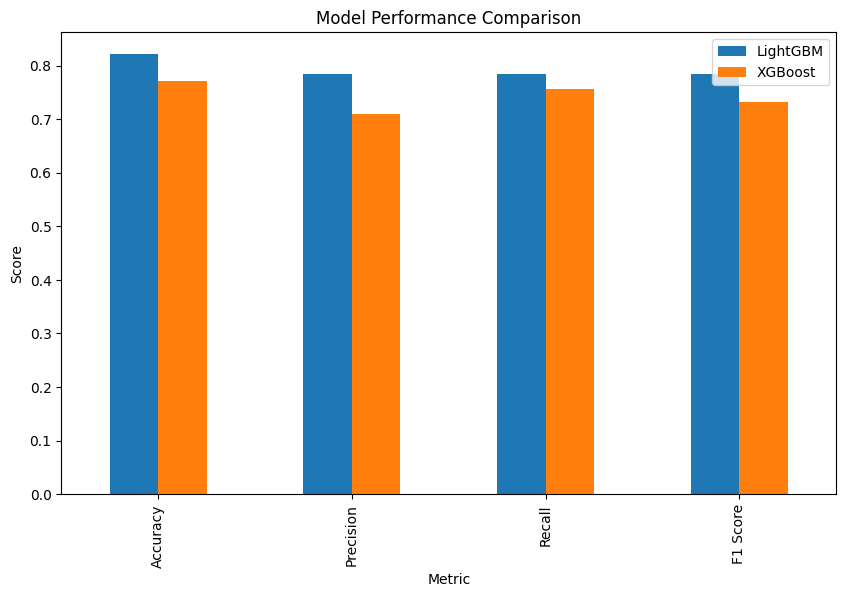

In [206]:
# Visualization of performance metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': lgb_metrics,
    'XGBoost': xgb_metrics
})

metrics_df.plot(x='Metric', kind='bar', figsize=(10, 6), title='Model Performance Comparison')
plt.ylabel('Score')
plt.show()


In [207]:
# Hyperparameter tuning for LightGBM
lgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'num_leaves': [31, 40, 50]
}

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgb_grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 40, 50]},
             scoring='accuracy')

In [208]:
# Best parameters and best score for LightGBM
print("Best parameters for LightGBM:", lgb_grid_search.best_params_)
print("Best score for LightGBM:", lgb_grid_search.best_score_)

Best parameters for LightGBM: {'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 31}
Best score for LightGBM: 0.8272333300502316


In [209]:
list(lgb_grid_search.best_params_.values())

[0.05, 200, 31]

In [210]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7]
}

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [211]:
# Best parameters and best score for XGBoost
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best score for XGBoost:", xgb_grid_search.best_score_)

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best score for XGBoost: 0.8370629370629372


In [212]:
list(xgb_grid_search.best_params_.values())

[0.05, 3, 200]

**Strengths and Weaknesses Analysis**

- Strengths of LightGBM:

  - Accuracy: Higher than XGBoost, indicating better overall performance in correctly classifying both survivors and non-survivors.
  - Recall: Higher than XGBoost, meaning it is better at identifying actual survivors, which is crucial if missing a survivor prediction has a high cost.
- Weaknesses of LightGBM:

  - Precision: Slightly lower than XGBoost, suggesting that it has more false positives (predicting someone would survive when they did not).

- Strengths of XGBoost:

  - Precision: Higher than LightGBM, indicating it is more accurate in its positive predictions, which is essential if false positives are particularly problematic.
  - F1 Score: Although slightly lower, it indicates a good balance, close to that of LightGBM.

- Weaknesses of XGBoost:

  - Accuracy: Lower than LightGBM, indicating it may not perform as well overall.
  - Recall: Lower than LightGBM, meaning it misses more actual survivors.

- Conclusion
  - LightGBM is generally more balanced with slightly better overall accuracy and recall, making it suitable for scenarios where identifying as many actual survivors as possible is important.
  - XGBoost has higher precision, making it better for situations where false positives are costly, but its lower recall means it misses more survivors.